Objetivo: Resolução lista 1 de otimização e programação linear

In [1]:
import Pkg

In [124]:
# Pkg.add("Plots")    # Adding plots package
# Pkg.add("JuMP")    # Adding plots package
# Pkg.add("GLPK")    # Adding plots package
# Pkg.add("CSV")    # Adding plots package
# Pkg.add("DataFrames")    # Adding plots package
# Pkg.add("GLM")    # Linear Regression package
# HiGHS need to explicity pass the version. Otherwise its installing the older version
# Pkg.add(Pkg.PackageSpec(;name="HiGHS", version="1.9.0"))
# Pkg.add("QuantReg")
# Pkg.add("MosekTools")
# Pkg.add("Ipopt")
# Pkg.add("Random")
# Pkg.add("LaTeXStrings")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.1
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [125]:
using Plots
using JuMP
using GLPK
using CSV
using DataFrames
using GLM
using HiGHS
# using QuantReg
# Different optimizer to use in quadratic optimization problemns
# using MosekTools
using Ipopt
using Random
using SparseArrays
using LaTeXStrings

# Inicializa o backend dos plots
gr()

Plots.GRBackend()

## Summary:


### Problema 1 -

In [4]:
A = [
2 1 1 0;
1 2 0 1
]
b = [
4; 4
]
c = [4 3 0 0]

1×4 Matrix{Int64}:
 4  3  0  0

In [5]:
# Dicionario 1 -
Nbase = [1, 2] 
base = [3, 4]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
cb*inv(B), cn - cb*inv(B)*N

([0.0 0.0], [4.0 3.0])

In [6]:
# Dicionario 2 -
Nbase = [1, 4] 
base = [2, 3]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
cb*inv(B), cn - cb*inv(B)*N

([0.0 1.5], [2.5 -1.5])

In [7]:
# Dicionario 3 -
Nbase = [3, 4] 
base = [1, 2]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
cb*inv(B), cn - cb*inv(B)*N

([1.6666666666666665 0.6666666666666667], [-1.6666666666666665 -0.6666666666666667])

In [8]:
# Dicionário 3 - Custo da solução ótima
y = cb*inv(B)
z = y*b

1-element Vector{Float64}:
 9.333333333333332

In [9]:
# Dicionario 4 -
Nbase = [2, 3] 
base = [1, 4]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
cb*inv(B), cn - cb*inv(B)*N

([2.0 0.0], [1.0 -2.0])

# Problema 2 - 

In [1]:
# Solução básica 1
A = [
1 1 -1 0 0;
1 0 0 1 0;
0 1 0 0 1;
]
b = [1, 2, 3] 
Nb = [4, 5] 

B = A[:, b]
N = A[:, Nb]

-inv(B)*N

3×2 Matrix{Float64}:
 -1.0   0.0
  0.0  -1.0
 -1.0  -1.0

In [6]:
# Solução básica 2
A = [
1 1 -1 0 0;
1 0 0 1 0;
0 1 0 0 1;
]
b = [1, 2, 5] 
Nb = [3, 4] 

B = A[:, b]
N = A[:, Nb]

-inv(B)*N

3×2 Matrix{Float64}:
  0.0  -1.0
  1.0   1.0
 -1.0  -1.0

In [10]:
# Solução básica 3
A = [
1 1 -1 0 0;
1 0 0 1 0;
0 1 0 0 1;
]
b = [1, 2, 4] 
Nb = [3, 5] 

B = A[:, b]
N = A[:, Nb]

-inv(B)*N

3×2 Matrix{Float64}:
  1.0   1.0
  0.0  -1.0
 -1.0  -1.0

### c)

In [12]:
#
A = [
1 1 1
    ]

1×3 Matrix{Int64}:
 1  1  1

# Problema 4

### a)

In [76]:
A = [2 1 1 0;
    1 2 0 1
]
b = [4;
    4]
c = [4 3 0 0]

1×4 Matrix{Int64}:
 4  3  0  0

In [77]:
# Base no ponto otimo
Nbase = [3, 4]
base = [1, 2]
B = A[:, base]
N = A[:, Nbase]
cb = c[:,base]
cn = c[:,Nbase]

1×2 Matrix{Int64}:
 0  0

In [78]:
inv(B)*b

2-element Vector{Float64}:
 1.3333333333333333
 1.3333333333333333

### b)

In [100]:
import Pkg

# Pkg.add("Random")

using Random
using SparseArrays

# Simplex fase 2
function simplex_fase2(A,b,c,Nbase,Bbase,max_iter, tolerance)
    m, n = size(A)
    k = n - m # número de variáveis não básicas (igual ao número de variáveis menos o número de restrições, 
    # sendo que cada restrição é uma variável básica)
    
    iter = 0
    status = -1    # não iniciado
    # Começo do loop
    while(iter<=max_iter)
        iter+=1
        println("iter:",iter)
        #B = view(A,:,Bbase)
        #N = view(A,:,Nbase)
        
        B = 1.0*A[:,Bbase]
        N = 1.0*A[:,Nbase]
        # Colocar os views, view evita a criação de uma nova matriz em outro bloco de memoria
        #apenas faz referencia aos endereco de memoria da matriz original
        cB = 1.0*c[Bbase]
        cN = 1.0*c[Nbase]
    
        println("B:",B)
        println("N:",N)
        println("Nbase:",Nbase)
        println("Bbase:",Bbase)

        x = zeros(n)
        
        xB = inv(B)*b
        println("xb", xB)
        x[Bbase] = xB
        println("x", x)
        if minimum(xB) < 0
            println("solução inicial inviável encontrada")
            return NaN,[],status,iter
        end
        # Calcular o custo reduzido
        y = (cB')*inv(B)
        println("y", y)
        cred = cN' - y*N
        println("Custo Reduzido:", cred)
        z = y*b
        println("Custo (z):", z)
        v,j = findmax(cred') #j é a variavel não básica que candidata a entrada na base
        if v <= 0
            println("Ótimo Encontrado")
            status = 1
            x = zeros(n)
            x[Bbase] = xB
            return z,x,status,iter,Bbase,Nbase
        end
        #troca de base
        dB = B\N[:,j]
        r = Inf
        i = 0

        for ii in 1:m
            if dB[ii] > 0 && xB[ii]/dB[ii] < r
                r = xB[ii]/dB[ii]
                i = ii
            end
        end

        #verificar se o problema é ilimitado
        if i == 0
            status = 0 # problema ilimitado
            println("ilimitado")
            return Inf,[], status,iter, Bbase, Nbase
        end

        # Atualizar a base

        aux = Bbase[i]
        Bbase[i] = Nbase[j]
        Nbase[j] = aux

        # fim do loop
    end
    return NaN,[],status,iter
end

# Testes
function tests_main(delta_2)

    max_iter =1000
    # Problema da produção original
    print("Teste do algoritmo para o: Problema da produção \n")
    A = 1.0*[
        2 1 1 0; 
        1 2 0 1
    ]
    c = 1.0*[
        4; 3 ; 0; 0
    ]
    b= 1.0*[
        4;
        4 + delta_2
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
    print(repeat("-", 200), "\n")
    return z
    
end

tests_main (generic function with 2 methods)

In [131]:
z_array = zeros(0)

deltas = [0:0.1:8;]

for i in deltas
    z_i = tests_main(i)
    append!(z_array, z_i[1])
end

Teste do algoritmo para o: Problema da produção 
iter:1
B:[1.0 0.0; 0.0 1.0]
N:[2.0 1.0; 1.0 2.0]
Nbase:[1, 2]
Bbase:[3, 4]
xb[4.0, 4.0]
x[0.0, 0.0, 4.0, 4.0]
y[0.0 0.0]
Custo Reduzido:[4.0 3.0]
Custo (z):0.0
iter:2
B:[2.0 0.0; 1.0 1.0]
N:[1.0 1.0; 0.0 2.0]
Nbase:[3, 2]
Bbase:[1, 4]
xb[2.0, 2.0]
x[2.0, 0.0, 0.0, 2.0]
y[2.0 0.0]
Custo Reduzido:[-2.0 1.0]
Custo (z):8.0
iter:3
B:[2.0 1.0; 1.0 2.0]
N:[1.0 0.0; 0.0 1.0]
Nbase:[3, 4]
Bbase:[1, 2]
xb[1.3333333333333333, 1.3333333333333333]
x[1.3333333333333333, 1.3333333333333333, 0.0, 0.0]
y[1.6666666666666665 0.6666666666666667]
Custo Reduzido:[-1.6666666666666665 -0.6666666666666667]
Custo (z):9.333333333333332
Ótimo Encontrado
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Teste do algoritmo para o: Problema da produção 
iter:1
B:[1.0 0.0; 0.0 1.0]
N:[2.0 1.0; 1.0 2.0]
Nbase:[1, 2]
Bbase

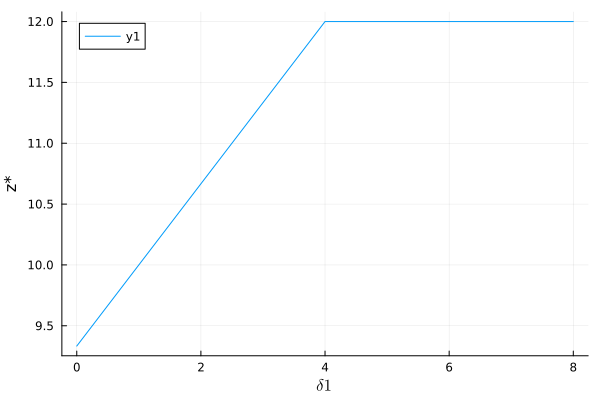

In [132]:
plot(deltas, z_array, xlabel=L"\delta1", ylabel="z*")

# Problema 5

In [160]:
# Definindo

A = [
2 1 2 1 0;
1 2 2 0 1
]
b = [
4; 4
]
c = [4; 3; 4.7; 0; 0]

5-element Vector{Float64}:
 4.0
 3.0
 4.7
 0.0
 0.0

In [161]:
# Base no ponto otimo
Nbase = [3, 4, 5]
base = [1, 2]
B = A[:, base]
N = A[:, Nbase]
cb = c[base]
cn = c[Nbase]

3-element Vector{Float64}:
 4.7
 0.0
 0.0

In [162]:
(cb')*inv(B)*N

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 4.66667  1.66667  0.666667

In [165]:
y*N

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 4.66667  1.66667  0.666667

In [166]:
y = (cb')*inv(B)
cred = cn' - y*N

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 0.0333333  -1.66667  -0.666667